<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
# data
observations = 1000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(-10, 10, (observations,1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1, 1, (observations,1))
generated_targets = 2*xs - 3*zs + 5 + noise
np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

# sizes
input_size = 2
output_size = 1

# outlining
inputs = tf.placeholder(tf.float32, [None, input_size])
targets = tf.placeholder(tf.float32, [None, output_size])
weights = tf.Variable(tf.random_uniform([input_size, output_size], minval=-0.1, maxval=0.1))
biases = tf.Variable(tf.random_uniform([output_size], minval=-0.1, maxval=0.1))
outputs = tf.matmul(inputs, weights) + biases

# loss func
mean_loss = tf.losses.mean_squared_error(labels=targets, predictions=outputs) / 2.
optimize = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(mean_loss)

# session
sess = tf.InteractiveSession()

# initialize
initializer = tf.global_variables_initializer()
sess.run(initializer)

# load data
training_data = np.load('TF_intro.npz')

In [4]:
# gradient descent
for i in range(100):
    _, curr_loss = sess.run([optimize, mean_loss], 
                     feed_dict={inputs: training_data['inputs'], 
                                targets: training_data['targets']})
    
print(curr_loss)

0.16811305


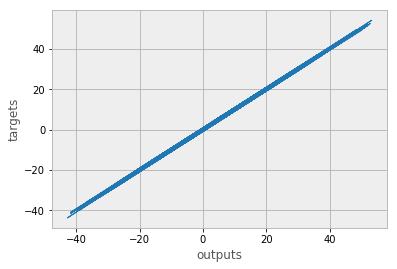

In [5]:
# get output
out = sess.run([outputs], 
               feed_dict={inputs: training_data['inputs']})
# plot
plt.plot(np.squeeze(out), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()